In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:
data = np.load('../fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac'][0:,0]
raw_Y=raw_Y.astype(np.float64)
raw_Y=np.expand_dims(raw_Y,-1)
NUM_TIMESTEPS = 65
BATCH_SIZE = 256   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 1) (1000, 1)


In [4]:
model = Sequential()
model.add(Dense(64,activation= 'sigmoid',input_shape=(65,)))
model.add(Dense(128,activation= 'sigmoid'))
model.add(Dense(256,activation= 'sigmoid'))
model.add(Dense(100,activation= 'sigmoid'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 71,369
Trainable params: 71,369
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 

Epoch 1/3000
8/8 [==============================] - 0s 14ms/step - loss: 10.7470 - mean_squared_error: 10.7470 - val_loss: 2.3772 - val_mean_squared_error: 2.3772
Epoch 2/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5977 - mean_squared_error: 1.5977 - val_loss: 1.7009 - val_mean_squared_error: 1.7009
Epoch 3/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9484 - mean_squared_error: 1.9484 - val_loss: 2.0184 - val_mean_squared_error: 2.0184
Epoch 4/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8407 - mean_squared_error: 1.8407 - val_loss: 1.5550 - val_mean_squared_error: 1.5550
Epoch 5/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.4184 - mean_squared_error: 1.4184 - val_loss: 1.3299 - val_mean_squared_error: 1.3299
Epoch 6/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3582 - mean_squared_error: 1.3582 - val_loss: 1.3804 - val_mean_squared_error: 1.3804
Epoch 7/3000
8/8 [===================

Epoch 52/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3364 - mean_squared_error: 1.3364 - val_loss: 1.3306 - val_mean_squared_error: 1.3306
Epoch 53/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3346 - mean_squared_error: 1.3346 - val_loss: 1.3305 - val_mean_squared_error: 1.3305
Epoch 54/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3346 - mean_squared_error: 1.3346 - val_loss: 1.3299 - val_mean_squared_error: 1.3299
Epoch 55/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3334 - mean_squared_error: 1.3334 - val_loss: 1.3298 - val_mean_squared_error: 1.3298
Epoch 56/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3343 - mean_squared_error: 1.3343 - val_loss: 1.3297 - val_mean_squared_error: 1.3297
Epoch 57/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3351 - mean_squared_error: 1.3351 - val_loss: 1.3298 - val_mean_squared_error: 1.3298
Epoch 58/3000
8/8 [===============

Epoch 103/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3359 - mean_squared_error: 1.3359 - val_loss: 1.3295 - val_mean_squared_error: 1.3295
Epoch 104/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3346 - mean_squared_error: 1.3346 - val_loss: 1.3307 - val_mean_squared_error: 1.3307
Epoch 105/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3342 - mean_squared_error: 1.3342 - val_loss: 1.3297 - val_mean_squared_error: 1.3297
Epoch 106/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3344 - mean_squared_error: 1.3344 - val_loss: 1.3298 - val_mean_squared_error: 1.3298
Epoch 107/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3340 - mean_squared_error: 1.3340 - val_loss: 1.3299 - val_mean_squared_error: 1.3299
Epoch 108/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3331 - mean_squared_error: 1.3331 - val_loss: 1.3298 - val_mean_squared_error: 1.3298
Epoch 109/3000
8/8 [========

Epoch 204/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3292 - mean_squared_error: 1.3292 - val_loss: 1.3265 - val_mean_squared_error: 1.3265
Epoch 205/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3297 - mean_squared_error: 1.3297 - val_loss: 1.3251 - val_mean_squared_error: 1.3251
Epoch 206/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3298 - mean_squared_error: 1.3298 - val_loss: 1.3253 - val_mean_squared_error: 1.3253
Epoch 207/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3334 - mean_squared_error: 1.3334 - val_loss: 1.3250 - val_mean_squared_error: 1.3250
Epoch 208/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3289 - mean_squared_error: 1.3289 - val_loss: 1.3275 - val_mean_squared_error: 1.3275
Epoch 209/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3336 - mean_squared_error: 1.3336 - val_loss: 1.3244 - val_mean_squared_error: 1.3244
Epoch 210/3000
8/8 [========

Epoch 305/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2348 - mean_squared_error: 1.2348 - val_loss: 1.2184 - val_mean_squared_error: 1.2184
Epoch 306/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2577 - mean_squared_error: 1.2577 - val_loss: 1.2744 - val_mean_squared_error: 1.2744
Epoch 307/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2325 - mean_squared_error: 1.2325 - val_loss: 1.2299 - val_mean_squared_error: 1.2299
Epoch 308/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2255 - mean_squared_error: 1.2255 - val_loss: 1.2206 - val_mean_squared_error: 1.2206
Epoch 309/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2069 - mean_squared_error: 1.2069 - val_loss: 1.2136 - val_mean_squared_error: 1.2136
Epoch 310/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2082 - mean_squared_error: 1.2082 - val_loss: 1.2207 - val_mean_squared_error: 1.2207
Epoch 311/3000
8/8 [========

Epoch 406/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0734 - mean_squared_error: 1.0734 - val_loss: 1.1313 - val_mean_squared_error: 1.1313
Epoch 407/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0725 - mean_squared_error: 1.0725 - val_loss: 1.0716 - val_mean_squared_error: 1.0716
Epoch 408/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0769 - mean_squared_error: 1.0769 - val_loss: 1.2928 - val_mean_squared_error: 1.2928
Epoch 409/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1814 - mean_squared_error: 1.1814 - val_loss: 1.1785 - val_mean_squared_error: 1.1785
Epoch 410/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1243 - mean_squared_error: 1.1243 - val_loss: 1.1111 - val_mean_squared_error: 1.1111
Epoch 411/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0664 - mean_squared_error: 1.0664 - val_loss: 1.0806 - val_mean_squared_error: 1.0806
Epoch 412/3000
8/8 [========

Epoch 507/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0381 - mean_squared_error: 1.0381 - val_loss: 1.0637 - val_mean_squared_error: 1.0637
Epoch 508/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0314 - mean_squared_error: 1.0314 - val_loss: 1.0442 - val_mean_squared_error: 1.0442
Epoch 509/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0663 - mean_squared_error: 1.0663 - val_loss: 1.0495 - val_mean_squared_error: 1.0495
Epoch 510/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0237 - mean_squared_error: 1.0237 - val_loss: 1.0522 - val_mean_squared_error: 1.0522
Epoch 511/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0186 - mean_squared_error: 1.0186 - val_loss: 1.0460 - val_mean_squared_error: 1.0460
Epoch 512/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0215 - mean_squared_error: 1.0215 - val_loss: 1.0433 - val_mean_squared_error: 1.0433
Epoch 513/3000
8/8 [========

Epoch 608/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0724 - mean_squared_error: 1.0724 - val_loss: 1.1512 - val_mean_squared_error: 1.1512
Epoch 609/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1325 - mean_squared_error: 1.1325 - val_loss: 1.0729 - val_mean_squared_error: 1.0729
Epoch 610/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1248 - mean_squared_error: 1.1248 - val_loss: 1.1026 - val_mean_squared_error: 1.1026
Epoch 611/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0316 - mean_squared_error: 1.0316 - val_loss: 1.0358 - val_mean_squared_error: 1.0358
Epoch 612/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0119 - mean_squared_error: 1.0119 - val_loss: 1.0541 - val_mean_squared_error: 1.0541
Epoch 613/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0303 - mean_squared_error: 1.0303 - val_loss: 1.0503 - val_mean_squared_error: 1.0503
Epoch 614/3000
8/8 [========

Epoch 709/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0092 - mean_squared_error: 1.0092 - val_loss: 1.0248 - val_mean_squared_error: 1.0248
Epoch 710/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0088 - mean_squared_error: 1.0088 - val_loss: 1.0665 - val_mean_squared_error: 1.0665
Epoch 711/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0169 - mean_squared_error: 1.0169 - val_loss: 1.0298 - val_mean_squared_error: 1.0298
Epoch 712/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0220 - mean_squared_error: 1.0220 - val_loss: 1.0376 - val_mean_squared_error: 1.0376
Epoch 713/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0420 - mean_squared_error: 1.0420 - val_loss: 1.0696 - val_mean_squared_error: 1.0696
Epoch 714/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0368 - mean_squared_error: 1.0368 - val_loss: 1.0594 - val_mean_squared_error: 1.0594
Epoch 715/3000
8/8 [========

Epoch 810/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0003 - mean_squared_error: 1.0003 - val_loss: 1.0286 - val_mean_squared_error: 1.0286
Epoch 811/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9904 - mean_squared_error: 0.9904 - val_loss: 1.0162 - val_mean_squared_error: 1.0162
Epoch 812/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9878 - mean_squared_error: 0.9878 - val_loss: 1.0174 - val_mean_squared_error: 1.0174
Epoch 813/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9882 - mean_squared_error: 0.9882 - val_loss: 1.0157 - val_mean_squared_error: 1.0157
Epoch 814/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0019 - mean_squared_error: 1.0019 - val_loss: 1.0204 - val_mean_squared_error: 1.0204
Epoch 815/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9953 - mean_squared_error: 0.9953 - val_loss: 1.0586 - val_mean_squared_error: 1.0586
Epoch 816/3000
8/8 [========

Epoch 911/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9911 - mean_squared_error: 0.9911 - val_loss: 1.0177 - val_mean_squared_error: 1.0177
Epoch 912/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9880 - mean_squared_error: 0.9880 - val_loss: 1.0108 - val_mean_squared_error: 1.0108
Epoch 913/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9838 - mean_squared_error: 0.9838 - val_loss: 1.0715 - val_mean_squared_error: 1.0715
Epoch 914/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0025 - mean_squared_error: 1.0025 - val_loss: 1.0394 - val_mean_squared_error: 1.0394
Epoch 915/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9928 - mean_squared_error: 0.9928 - val_loss: 1.0097 - val_mean_squared_error: 1.0097
Epoch 916/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9825 - mean_squared_error: 0.9825 - val_loss: 1.0101 - val_mean_squared_error: 1.0101
Epoch 917/3000
8/8 [========

8/8 [==============================] - 0s 4ms/step - loss: 0.9809 - mean_squared_error: 0.9809 - val_loss: 1.0088 - val_mean_squared_error: 1.0088
Epoch 1012/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9762 - mean_squared_error: 0.9762 - val_loss: 1.0273 - val_mean_squared_error: 1.0273
Epoch 1013/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9897 - mean_squared_error: 0.9897 - val_loss: 1.0096 - val_mean_squared_error: 1.0096
Epoch 1014/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0088 - mean_squared_error: 1.0088 - val_loss: 1.0060 - val_mean_squared_error: 1.0060
Epoch 1015/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9977 - mean_squared_error: 0.9977 - val_loss: 1.0171 - val_mean_squared_error: 1.0171
Epoch 1016/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0077 - mean_squared_error: 1.0077 - val_loss: 1.0090 - val_mean_squared_error: 1.0090
Epoch 1017/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9746 - mean_squared_error: 0.9746 - val_loss: 1.0159 - val_mean_squared_error: 1.0159
Epoch 1112/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9715 - mean_squared_error: 0.9715 - val_loss: 1.0170 - val_mean_squared_error: 1.0170
Epoch 1113/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9959 - mean_squared_error: 0.9959 - val_loss: 1.0302 - val_mean_squared_error: 1.0302
Epoch 1114/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9785 - mean_squared_error: 0.9785 - val_loss: 1.0054 - val_mean_squared_error: 1.0054
Epoch 1115/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9768 - mean_squared_error: 0.9768 - val_loss: 1.0107 - val_mean_squared_error: 1.0107
Epoch 1116/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9739 - mean_squared_error: 0.9739 - val_loss: 1.0048 - val_mean_squared_error: 1.0048
Epoch 1117/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9783 - mean_squared_error: 0.9783 - val_loss: 1.0005 - val_mean_squared_error: 1.0005
Epoch 1212/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9719 - mean_squared_error: 0.9719 - val_loss: 0.9995 - val_mean_squared_error: 0.9995
Epoch 1213/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9951 - mean_squared_error: 0.9951 - val_loss: 1.0094 - val_mean_squared_error: 1.0094
Epoch 1214/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0044 - mean_squared_error: 1.0044 - val_loss: 1.0651 - val_mean_squared_error: 1.0651
Epoch 1215/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0157 - mean_squared_error: 1.0157 - val_loss: 1.0315 - val_mean_squared_error: 1.0315
Epoch 1216/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0513 - mean_squared_error: 1.0513 - val_loss: 1.0450 - val_mean_squared_error: 1.0450
Epoch 1217/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 1.0040 - mean_squared_error: 1.0040 - val_loss: 1.1149 - val_mean_squared_error: 1.1149
Epoch 1312/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9998 - mean_squared_error: 0.9998 - val_loss: 1.0322 - val_mean_squared_error: 1.0322
Epoch 1313/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9910 - mean_squared_error: 0.9910 - val_loss: 1.0111 - val_mean_squared_error: 1.0111
Epoch 1314/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9815 - mean_squared_error: 0.9815 - val_loss: 1.0308 - val_mean_squared_error: 1.0308
Epoch 1315/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9806 - mean_squared_error: 0.9806 - val_loss: 1.0000 - val_mean_squared_error: 1.0000
Epoch 1316/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.9718 - mean_squared_error: 0.9718 - val_loss: 0.9997 - val_mean_squared_error: 0.9997
Epoch 1317/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9703 - mean_squared_error: 0.9703 - val_loss: 1.0469 - val_mean_squared_error: 1.0469
Epoch 1412/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9783 - mean_squared_error: 0.9783 - val_loss: 1.0060 - val_mean_squared_error: 1.0060
Epoch 1413/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9673 - mean_squared_error: 0.9673 - val_loss: 0.9941 - val_mean_squared_error: 0.9941
Epoch 1414/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9794 - mean_squared_error: 0.9794 - val_loss: 1.0860 - val_mean_squared_error: 1.0860
Epoch 1415/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0193 - mean_squared_error: 1.0193 - val_loss: 1.1135 - val_mean_squared_error: 1.1135
Epoch 1416/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1342 - mean_squared_error: 1.1342 - val_loss: 1.1556 - val_mean_squared_error: 1.1556
Epoch 1417/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9771 - mean_squared_error: 0.9771 - val_loss: 0.9922 - val_mean_squared_error: 0.9922
Epoch 1512/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9754 - mean_squared_error: 0.9754 - val_loss: 1.0264 - val_mean_squared_error: 1.0264
Epoch 1513/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9896 - mean_squared_error: 0.9896 - val_loss: 0.9933 - val_mean_squared_error: 0.9933
Epoch 1514/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9647 - mean_squared_error: 0.9647 - val_loss: 0.9976 - val_mean_squared_error: 0.9976
Epoch 1515/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9669 - mean_squared_error: 0.9669 - val_loss: 0.9932 - val_mean_squared_error: 0.9932
Epoch 1516/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9660 - mean_squared_error: 0.9660 - val_loss: 1.0129 - val_mean_squared_error: 1.0129
Epoch 1517/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9625 - mean_squared_error: 0.9625 - val_loss: 1.0137 - val_mean_squared_error: 1.0137
Epoch 1612/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9884 - mean_squared_error: 0.9884 - val_loss: 0.9899 - val_mean_squared_error: 0.9899
Epoch 1613/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9994 - mean_squared_error: 0.9994 - val_loss: 0.9898 - val_mean_squared_error: 0.9898
Epoch 1614/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0035 - mean_squared_error: 1.0035 - val_loss: 1.1400 - val_mean_squared_error: 1.1400
Epoch 1615/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0366 - mean_squared_error: 1.0366 - val_loss: 1.0192 - val_mean_squared_error: 1.0192
Epoch 1616/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9788 - mean_squared_error: 0.9788 - val_loss: 0.9960 - val_mean_squared_error: 0.9960
Epoch 1617/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9814 - mean_squared_error: 0.9814 - val_loss: 0.9904 - val_mean_squared_error: 0.9904
Epoch 1712/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9883 - mean_squared_error: 0.9883 - val_loss: 1.0207 - val_mean_squared_error: 1.0207
Epoch 1713/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9838 - mean_squared_error: 0.9838 - val_loss: 0.9958 - val_mean_squared_error: 0.9958
Epoch 1714/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0151 - mean_squared_error: 1.0151 - val_loss: 1.0426 - val_mean_squared_error: 1.0426
Epoch 1715/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9867 - mean_squared_error: 0.9867 - val_loss: 1.0007 - val_mean_squared_error: 1.0007
Epoch 1716/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9976 - mean_squared_error: 0.9976 - val_loss: 0.9963 - val_mean_squared_error: 0.9963
Epoch 1717/3000
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 0.9557 - mean_squared_error: 0.9557 - val_loss: 1.0162 - val_mean_squared_error: 1.0162
Epoch 1812/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9852 - mean_squared_error: 0.9852 - val_loss: 1.0737 - val_mean_squared_error: 1.0737
Epoch 1813/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0023 - mean_squared_error: 1.0023 - val_loss: 0.9916 - val_mean_squared_error: 0.9916
Epoch 1814/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9588 - mean_squared_error: 0.9588 - val_loss: 1.0098 - val_mean_squared_error: 1.0098
Epoch 1815/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9758 - mean_squared_error: 0.9758 - val_loss: 0.9873 - val_mean_squared_error: 0.9873
Epoch 1816/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9577 - mean_squared_error: 0.9577 - val_loss: 0.9955 - val_mean_squared_error: 0.9955
Epoch 1817/3000
8/8 [=================

8/8 [==============================] - 0s 3ms/step - loss: 0.9608 - mean_squared_error: 0.9608 - val_loss: 0.9869 - val_mean_squared_error: 0.9869
Epoch 1912/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9798 - mean_squared_error: 0.9798 - val_loss: 1.0061 - val_mean_squared_error: 1.0061
Epoch 1913/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0212 - mean_squared_error: 1.0212 - val_loss: 1.0322 - val_mean_squared_error: 1.0322
Epoch 1914/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9796 - mean_squared_error: 0.9796 - val_loss: 0.9864 - val_mean_squared_error: 0.9864
Epoch 1915/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9617 - mean_squared_error: 0.9617 - val_loss: 1.0046 - val_mean_squared_error: 1.0046
Epoch 1916/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9610 - mean_squared_error: 0.9610 - val_loss: 0.9841 - val_mean_squared_error: 0.9841
Epoch 1917/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 1.0121 - mean_squared_error: 1.0121 - val_loss: 0.9882 - val_mean_squared_error: 0.9882
Epoch 2012/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9623 - mean_squared_error: 0.9623 - val_loss: 0.9913 - val_mean_squared_error: 0.9913
Epoch 2013/3000
8/8 [==============================] - ETA: 0s - loss: 0.9044 - mean_squared_error: 0.90 - 0s 4ms/step - loss: 0.9592 - mean_squared_error: 0.9592 - val_loss: 0.9839 - val_mean_squared_error: 0.9839
Epoch 2014/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9589 - mean_squared_error: 0.9589 - val_loss: 0.9834 - val_mean_squared_error: 0.9834
Epoch 2015/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9692 - mean_squared_error: 0.9692 - val_loss: 1.0254 - val_mean_squared_error: 1.0254
Epoch 2016/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9739 - mean_squared_error: 0.9739 - val_loss: 1.0064 - val_mean_squared_

8/8 [==============================] - 0s 4ms/step - loss: 1.0171 - mean_squared_error: 1.0171 - val_loss: 1.0143 - val_mean_squared_error: 1.0143
Epoch 2062/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9605 - mean_squared_error: 0.9605 - val_loss: 0.9837 - val_mean_squared_error: 0.9837
Epoch 2063/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9572 - mean_squared_error: 0.9572 - val_loss: 0.9831 - val_mean_squared_error: 0.9831
Epoch 2064/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9638 - mean_squared_error: 0.9638 - val_loss: 0.9885 - val_mean_squared_error: 0.9885
Epoch 2065/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9816 - mean_squared_error: 0.9816 - val_loss: 0.9995 - val_mean_squared_error: 0.9995
Epoch 2066/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9683 - mean_squared_error: 0.9683 - val_loss: 0.9832 - val_mean_squared_error: 0.9832
Epoch 2067/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9534 - mean_squared_error: 0.9534 - val_loss: 1.0062 - val_mean_squared_error: 1.0062
Epoch 2162/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9708 - mean_squared_error: 0.9708 - val_loss: 0.9887 - val_mean_squared_error: 0.9887
Epoch 2163/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9590 - mean_squared_error: 0.9590 - val_loss: 0.9894 - val_mean_squared_error: 0.9894
Epoch 2164/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9683 - mean_squared_error: 0.9683 - val_loss: 0.9814 - val_mean_squared_error: 0.9814
Epoch 2165/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9955 - mean_squared_error: 0.9955 - val_loss: 0.9959 - val_mean_squared_error: 0.9959
Epoch 2166/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0055 - mean_squared_error: 1.0055 - val_loss: 0.9803 - val_mean_squared_error: 0.9803
Epoch 2167/3000
8/8 [=================

8/8 [==============================] - 0s 3ms/step - loss: 1.0024 - mean_squared_error: 1.0024 - val_loss: 1.0026 - val_mean_squared_error: 1.0026
Epoch 2262/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0301 - mean_squared_error: 1.0301 - val_loss: 1.0269 - val_mean_squared_error: 1.0269
Epoch 2263/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0007 - mean_squared_error: 1.0007 - val_loss: 1.0484 - val_mean_squared_error: 1.0484
Epoch 2264/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0010 - mean_squared_error: 1.0010 - val_loss: 1.0033 - val_mean_squared_error: 1.0033
Epoch 2265/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9825 - mean_squared_error: 0.9825 - val_loss: 0.9866 - val_mean_squared_error: 0.9866
Epoch 2266/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9725 - mean_squared_error: 0.9725 - val_loss: 1.0110 - val_mean_squared_error: 1.0110
Epoch 2267/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9485 - mean_squared_error: 0.9485 - val_loss: 1.0001 - val_mean_squared_error: 1.0001
Epoch 2362/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9547 - mean_squared_error: 0.9547 - val_loss: 1.0165 - val_mean_squared_error: 1.0165
Epoch 2363/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9737 - mean_squared_error: 0.9737 - val_loss: 0.9785 - val_mean_squared_error: 0.9785
Epoch 2364/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9679 - mean_squared_error: 0.9679 - val_loss: 1.0490 - val_mean_squared_error: 1.0490
Epoch 2365/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9732 - mean_squared_error: 0.9732 - val_loss: 0.9794 - val_mean_squared_error: 0.9794
Epoch 2366/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9530 - mean_squared_error: 0.9530 - val_loss: 1.0552 - val_mean_squared_error: 1.0552
Epoch 2367/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9644 - mean_squared_error: 0.9644 - val_loss: 0.9788 - val_mean_squared_error: 0.9788
Epoch 2462/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9562 - mean_squared_error: 0.9562 - val_loss: 0.9826 - val_mean_squared_error: 0.9826
Epoch 2463/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9571 - mean_squared_error: 0.9571 - val_loss: 0.9772 - val_mean_squared_error: 0.9772
Epoch 2464/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9586 - mean_squared_error: 0.9586 - val_loss: 0.9959 - val_mean_squared_error: 0.9959
Epoch 2465/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9520 - mean_squared_error: 0.9520 - val_loss: 0.9782 - val_mean_squared_error: 0.9782
Epoch 2466/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9563 - mean_squared_error: 0.9563 - val_loss: 1.0295 - val_mean_squared_error: 1.0295
Epoch 2467/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9614 - mean_squared_error: 0.9614 - val_loss: 0.9812 - val_mean_squared_error: 0.9812
Epoch 2562/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9536 - mean_squared_error: 0.9536 - val_loss: 0.9764 - val_mean_squared_error: 0.9764
Epoch 2563/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9505 - mean_squared_error: 0.9505 - val_loss: 0.9767 - val_mean_squared_error: 0.9767
Epoch 2564/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9469 - mean_squared_error: 0.9469 - val_loss: 0.9954 - val_mean_squared_error: 0.9954
Epoch 2565/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9747 - mean_squared_error: 0.9747 - val_loss: 0.9837 - val_mean_squared_error: 0.9837
Epoch 2566/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9682 - mean_squared_error: 0.9682 - val_loss: 0.9925 - val_mean_squared_error: 0.9925
Epoch 2567/3000
8/8 [=================

8/8 [==============================] - 0s 3ms/step - loss: 0.9673 - mean_squared_error: 0.9673 - val_loss: 0.9973 - val_mean_squared_error: 0.9973
Epoch 2662/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9658 - mean_squared_error: 0.9658 - val_loss: 1.0161 - val_mean_squared_error: 1.0161
Epoch 2663/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9704 - mean_squared_error: 0.9704 - val_loss: 0.9823 - val_mean_squared_error: 0.9823
Epoch 2664/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9650 - mean_squared_error: 0.9650 - val_loss: 0.9824 - val_mean_squared_error: 0.9824
Epoch 2665/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9484 - mean_squared_error: 0.9484 - val_loss: 0.9862 - val_mean_squared_error: 0.9862
Epoch 2666/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9756 - mean_squared_error: 0.9756 - val_loss: 1.0316 - val_mean_squared_error: 1.0316
Epoch 2667/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 1.0319 - mean_squared_error: 1.0319 - val_loss: 0.9792 - val_mean_squared_error: 0.9792
Epoch 2762/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0016 - mean_squared_error: 1.0016 - val_loss: 1.0406 - val_mean_squared_error: 1.0406
Epoch 2763/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9893 - mean_squared_error: 0.9893 - val_loss: 1.0032 - val_mean_squared_error: 1.0032
Epoch 2764/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9649 - mean_squared_error: 0.9649 - val_loss: 0.9783 - val_mean_squared_error: 0.9783
Epoch 2765/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.9497 - mean_squared_error: 0.9497 - val_loss: 0.9756 - val_mean_squared_error: 0.9756
Epoch 2766/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9519 - mean_squared_error: 0.9519 - val_loss: 0.9862 - val_mean_squared_error: 0.9862
Epoch 2767/3000
8/8 [=================

8/8 [==============================] - 0s 3ms/step - loss: 0.9895 - mean_squared_error: 0.9895 - val_loss: 1.1766 - val_mean_squared_error: 1.1766
Epoch 2862/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0057 - mean_squared_error: 1.0057 - val_loss: 0.9790 - val_mean_squared_error: 0.9790
Epoch 2863/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0254 - mean_squared_error: 1.0254 - val_loss: 1.0627 - val_mean_squared_error: 1.0627
Epoch 2864/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0133 - mean_squared_error: 1.0133 - val_loss: 0.9969 - val_mean_squared_error: 0.9969
Epoch 2865/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9787 - mean_squared_error: 0.9787 - val_loss: 1.0418 - val_mean_squared_error: 1.0418
Epoch 2866/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.9587 - mean_squared_error: 0.9587 - val_loss: 0.9787 - val_mean_squared_error: 0.9787
Epoch 2867/3000
8/8 [=================

8/8 [==============================] - 0s 4ms/step - loss: 0.9750 - mean_squared_error: 0.9750 - val_loss: 0.9807 - val_mean_squared_error: 0.9807
Epoch 2962/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0162 - mean_squared_error: 1.0162 - val_loss: 0.9878 - val_mean_squared_error: 0.9878
Epoch 2963/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0468 - mean_squared_error: 1.0468 - val_loss: 1.0919 - val_mean_squared_error: 1.0919
Epoch 2964/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0097 - mean_squared_error: 1.0097 - val_loss: 1.0886 - val_mean_squared_error: 1.0886
Epoch 2965/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0767 - mean_squared_error: 1.0767 - val_loss: 1.1263 - val_mean_squared_error: 1.1263
Epoch 2966/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0343 - mean_squared_error: 1.0343 - val_loss: 0.9744 - val_mean_squared_error: 0.9744
Epoch 2967/3000
8/8 [=================

In [12]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.976, RMSE: 0.988
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


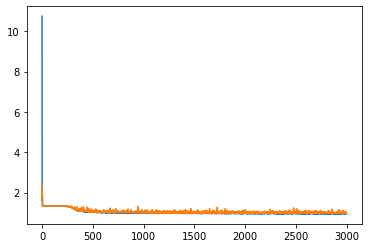

In [7]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

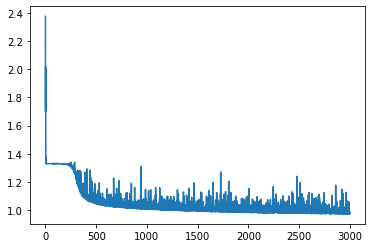

In [8]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [9]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[2.8310153]
 [2.8209243]
 [2.938387 ]
 [3.6719027]
 [3.252951 ]
 [2.5025434]
 [3.3452497]
 [2.0125325]
 [2.3196597]
 [2.8485014]
 [2.7858622]
 [3.7876747]
 [3.4349883]
 [3.712282 ]
 [2.4067667]
 [2.7991054]
 [2.8437076]
 [2.3468559]
 [2.4028456]
 [2.9041567]
 [3.9865317]
 [3.26653  ]
 [2.080266 ]
 [2.7665515]
 [3.1079311]
 [2.9396703]
 [3.0296667]
 [2.5032945]
 [3.7870662]
 [2.4342275]
 [2.0848897]
 [3.0191178]
 [2.8208435]
 [2.5087883]
 [2.9925098]
 [3.0356119]
 [2.6372948]
 [2.2547903]
 [2.2611187]
 [2.876304 ]
 [3.7079668]
 [2.4921553]
 [3.3973043]
 [3.5696557]
 [4.0782857]
 [2.6293716]
 [3.0600348]
 [2.3403811]
 [2.9962504]
 [3.7005858]
 [2.8071492]
 [1.7617657]
 [1.9672067]
 [2.6692877]
 [3.464156 ]
 [3.31557  ]
 [2.3315275]
 [3.5097322]
 [3.718746 ]
 [3.4264095]
 [2.4458544]
 [2.4408627]
 [2.846869 ]
 [2.645235 ]
 [2.737602 ]
 [2.9247324]
 [3.7083597]
 [1.9167655]
 [3.6409445]
 [2.825657 ]
 [2.3771253]
 [2.8515396]
 [2.4265027]
 [2.365313 ]
 [2.946562 ]
 [2.175058 ]
 [2.1451287]

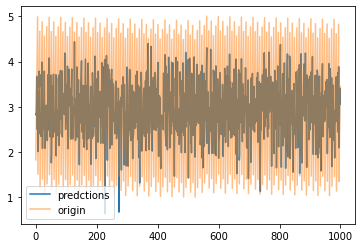

In [10]:
plt.figure()
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


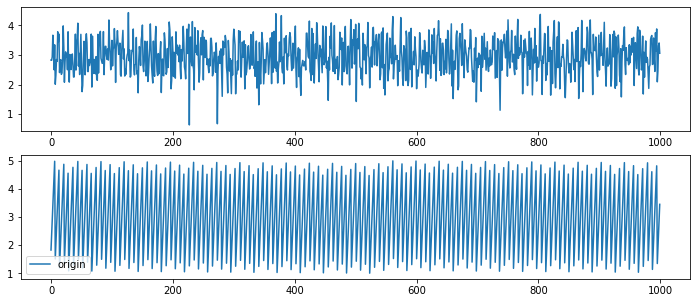

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()